# Prototipazione Rapida con Open Data e Machine Learning
## Cremona, 16/12/2022
### Dr. Ir. Jacopo De Stefani - `J.deStefani@tudelft.nl`

# Outline of the workshop

**1st hour: Introduction to Open Data**
- 10-20 min theoretical introduction
- 30-40 min hands on exercises exploring/gathering open data
**2nd hour: Introduction to Data Analytics**
- 10-20 min theoretical introduction
- 30-40 min hands on exercises on data preprocessing and visualization
- 5-10 min break

**Longer break: 15 minutes**

**3rd hour: Introduction to ML/AI**
- 10-20 min theoretical introduction
- 30-40 min hands on exercises implementing ML models using Sklearn/Keras
- 5-10 min break
**4th hour: Wrap-up and publication of the final work**
- 10-20 min theoretical introduction
- 30-40 min Wrapping up and finalizing


# 1. Introduction to Open Data


## Data sources

### Global websites
- Proprietary sources
    - Kaggle
    - Google Datasets
    - …
- Governmental sources
    - EU: https://data.europa.eu/en
    - US: https://www.data.gov/
    - …
- Academic sources
    - UCI Machine Learning Repository
    - …

### National websites
- Governmental sources
    - https://github.com/italia/awesome-italian-public-datasets
    - https://www.kaggle.com/general/27278

### Local websites
- Governmental sources
    - https://www.dati.lombardia.it


## Activity 1.1

Explore the different data sources to find a dataset which is particularly relevant to you.
If this seems overwhelming, you can have a look in the `data` folder for some pre-selected examples.

Try to answer the following questions:
- In which format is this dataset?
- Which computer program can you use to open this data?


Write your answers here

## Activity 1.2

We are now going to try to import the different data types in Python.
1. Have a look at the documentation of the [Pandas](https://pandas.pydata.org/) library (and specifically the `read_` functions) in order to determine how to use it.
2. Try to use these function to read data into your Python code.

In [6]:
import pandas as pd
dati = pd.read_csv("data/05000033_005_202211.csv")

## Activity 1.3

Let's focus on a CSV dataset.
1. Store it in a Python variable as a Pandas DataFrame.
2. Use the Pandas built-in functions (`info, describe, value_counts, nunique`) to provide a summary of the dataset.
3. Try to select the first 5 lines of the dataset.
4. Try to select the first 3 columns of the dataset.

In [7]:
dati.info()
dati.describe()
dati.value_counts()
dati.nunique()
dati.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COD_STAZ     322 non-null    int64 
 1   ID_PARAM     322 non-null    int64 
 2   DATA_FINE    322 non-null    object
 3   VALORE       322 non-null    int64 
 4   VALIDAZIONE  322 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.7+ KB


,COD_STAZ,ID_PARAM,DATA_FINE,VALORE,VALIDAZIONE
0,5000033,5,02/01/2022 00:00,37,S
1,5000033,5,03/01/2022 00:00,25,S
2,5000033,5,04/01/2022 00:00,15,S
3,5000033,5,05/01/2022 00:00,26,S
4,5000033,5,06/01/2022 00:00,19,S


# 2. Introduction to Data Analytics

## Activity 2.1

Let's now focus on a [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)
that we had previously imported in the `stroke_df` variable.
We are going to use the `pandas` library to perform some exploratory understanding of the data.

1. Load the dataset in the `stroke_df` variable
2. Display the content of the `stroke_df` variable
3. What are the type of the different columns? Use the knowledge from `pandas` to determine the type.


In [8]:
import pandas as pd
stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.xls")
stroke_df.loc[0:4,:]   # effettua lo slicing dei dati

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
import pandas as pd
stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.xls")
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Activity 2.2

Two type of variables occur in this dataset:
- Numeric: `int64` and `float64`
- Categorical: `object`

We are going to use the `seaborn` library to perform some exploratory visualizations.
Have a look at the documentation of the [Seaborn](https://seaborn.pydata.org/) library and the Gallery to get some inspiration for some plots.
According to the type of variables, different visualizatons can be used

- Numeric - Numeric: Scatterplot
- (Numeric - Categorical)/(Categorical - Numeric): Boxplot, Scatterplot, Violin plot

1. Use the Seaborn library to explore the data. 
2. Try to answer to some of these questions using the seaborne library:
    1) Who has more strokes between Male/Female?
    2) People of which age group are more likely to get a stroke?
    3) Is hypertension a cause?
    4) Is A person with heart disease more likely to get a stroke ?
    5) May Marriage be a cause of strokes ?
    6) Are people working in private jobs the majority of people with strokes (mostly because of stress) ?
    7) Do people living in urban areas have more chances of getting stroke?
    8) Are glucose levels a symptom of stroke ? Or of a pathology, such as obesity, leading to stroke ?
    9) What is the relationship between BMI, age and gender?
    10) Are people who smoke more likely to get a stroke ?
    
NB SEE https://www.html.it/pag/405220/seaborn/

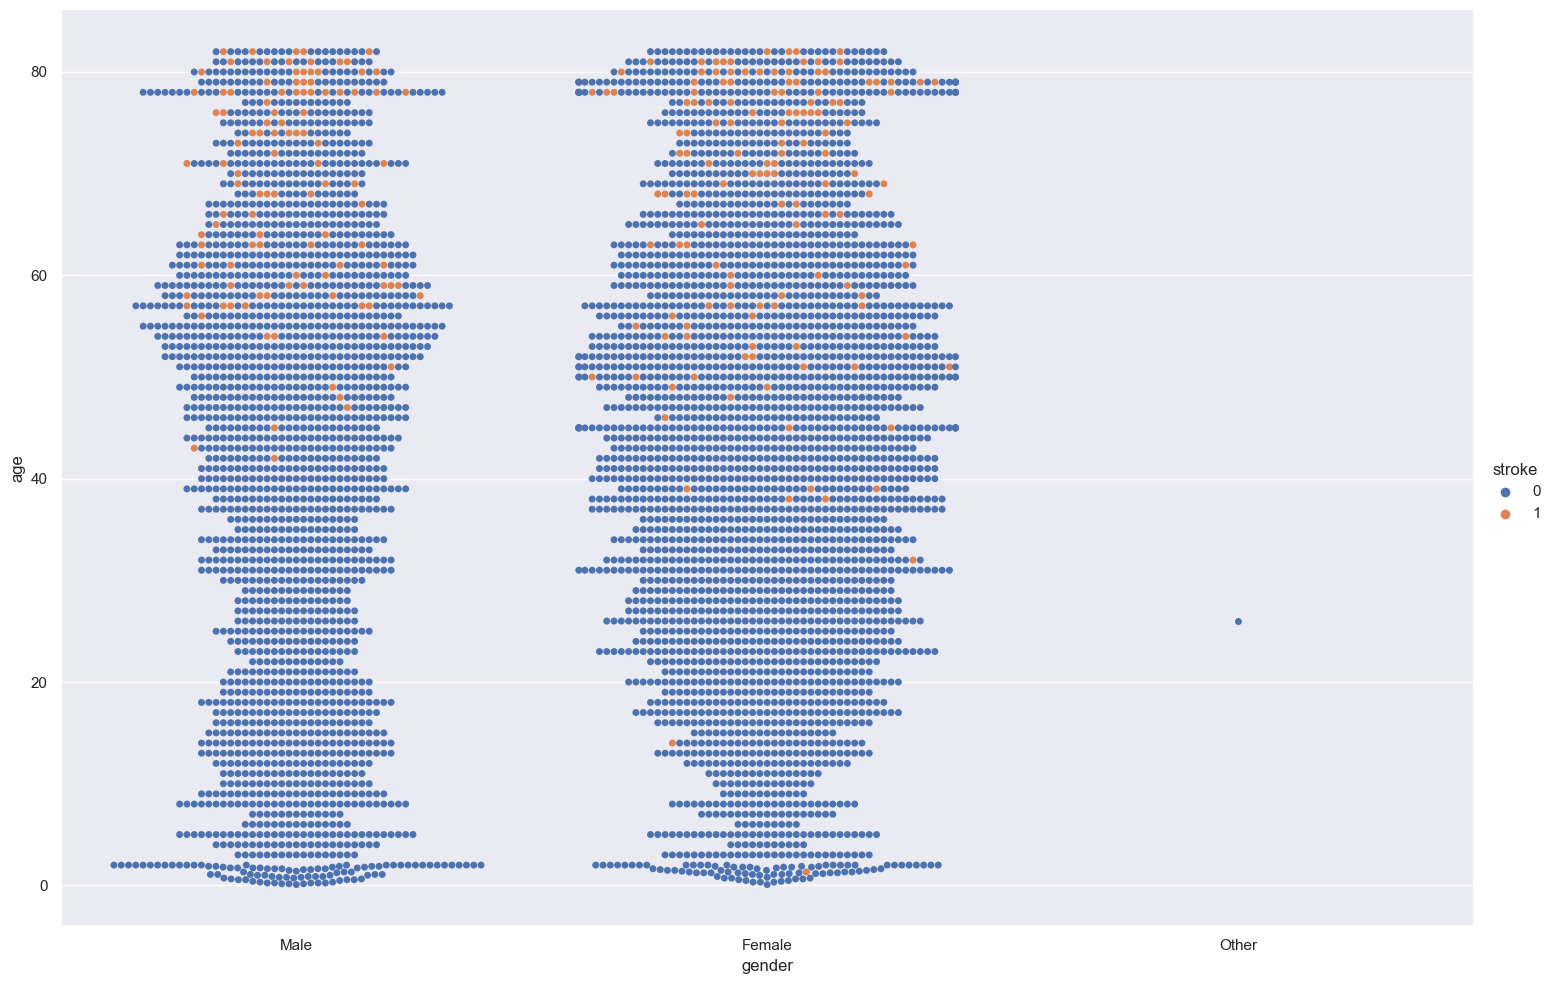

In [11]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# draw boxplot
# sns.boxplot(x="gender", y="age", hue="smoking_status", palette=["m", "g"], data=stroke)
# sns.despine(offset=10, trim=True)

# draw scatter
# sns.scatterplot(data=stroke, x="age", y="bmi", hue="heart_disease")catplot("")

# draw heatmap
# sns.heatmap(stroke.corr())


# draw catplot
sns.catplot(data=stroke_df, x="gender", y="age", hue="stroke", kind="swarm", height=10, aspect=1.5)


### Activity 2.3

A common problem in many datasets is missing or incomplete data, usually indicated by N/A, NA, NaN, or extreme values.

1. Is there any column containing missing data in this dataset?
2. If there are any, display the column(s) containing missing data.

Several ways exist to deal with incomplete or missing data, the most common being:
- Removing the lines having missing/incomplete data
- Replacing the missing/incomplete data by meaningful values (e.g. the mean, the median, a numeric values signalling the error)

3. Count the number of missing values in the column(s) containing missing data.
4. In this case, we are going to drop the missing values using the `dropna` function from `pandas`.

In [12]:
#stroke.isnull()
stroke_df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [14]:
stroke_df.shape
stroke_noNA = stroke_df.dropna()

# 3. Introduction to Machine Learning

## Activity 3.1

In order to apply Machine Learning on the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv) that we had previously imported in the `stroke_df` variable, we need to perform the following operations:

1. Impute missing values (Done in 2.3 by dropping the missing values)
2. Split data into training and test using the `train_test_split` function (3.1)
3. Transform categorical variables (3.2)

Please note that the transformation in categorical variables needs to be done after the split into training and test set in order to avoid information leakage (normally the testing set should not be seen by the model during its training phase).
We are going to use the `scikit-learn` library to perform most of the split and transformation tasks.

Here you need to:
1. Divide the `stroke_noNA_df` dataset into two variables:
- `X` containing the input variables
- `Y` containing the target variable
2. Use the `train_test_split` function to obtain `X_train, X_test, Y_train, Y_test`

 NB la variabile di output sarà heart_disease, le variabili di input saranno tutte le altre tranne ID
    Il nostro modello di ML cercherà quindi di predire l'occorrenza o no di un aneurisma

In [24]:
from sklearn.model_selection import train_test_split

X=stroke_noNA.iloc[:,1:11]
Y=stroke_noNA.iloc[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Activity 3.2

Before inputting the data to a Machine Learning model, we need all the inputs to be numeric.
In order to transform categorical data into numeric ones, three techniques exist (cf. https://www.kaggle.com/code/alexisbcook/categorical-variables):
- Dropping Categorical variables
- Ordinal Encoding: A categorical variable is replaced by a single numerical variable, where each category is mapped to a different, increasing integer value.
- One-hot Encoding: A categorical variable with $n$ different categories is replaced by $n$ binary variables, each of them corresponding to a category. 

We are going to use the `scikit-learn` library to perform the transformation of the variables and to subsequently fit the models.

1. Have a look at the documentation of the [Scikit-learn](https://scikit-learn.org/stable/index.html) library 
2. Have a look at the following code to perform the transformation of categorical variables:
- Dropping Categorical variables: `drop_X_train` and `drop_X_test`
- Ordinal Encoding: `label_X_train` and `label_X_test`
- One-hot Encoding: `OH_X_train` and `OH_X_test`

In [33]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Dropping categorical variables

In [26]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_test = X_test.select_dtypes(exclude=['object'])


### Ordinal Encoding

In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])


### One-hot Encoding

In [37]:
import pandas as pandas
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pandas.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pandas.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pandas.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pandas.concat([num_X_test, OH_cols_test], axis=1)


C:\Users\FIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
# Get list of categorical variables
s = (OH_X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


## Activity 3.3

Finally, we are able to fit some models using the `scikit-learn` library.
As a starter, we will will be using a [Naive Bayesian Model](https://scikit-learn.org/stable/modules/naive_bayes.html)

1. Have a look at the documentation of the [Scikit-learn](https://scikit-learn.org/stable/index.html) library for the Naive Bayes model.
2. Initialize the model
3. Use the `fit` function to perform the training of the model on the training set
4. Use the `predict` function to perform the prediction of the model on the test set
5. Use the `accuracy_score, balanced_accuracy_score, f1_score` to compare the predictions with the actual values and obtain some performance metrics about the models

NB mai limitarsi ad una sola metrica (in questo caso i dati sono non bilanciati, pallini blu molti più degli arancio!!!)

In [52]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(label_X_train,Y_train)

#Predict Output
predicted= model.predict(label_X_test) # 0:no stroke, 1:stroke
print ("Predicted Value:", predicted)
print("Accuracy:", metrics.accuracy_score(Y_test, predicted))
print("f1score:", metrics.f1_score(Y_test, predicted))




Predicted Value: [1 0 1 ... 0 0 0]
Accuracy: 0.8689748811948405
f1score: 0.24313725490196078


## Activity 3.4

Now that you are familiar with the pipeline of training, testing and evaluating one model, you can easily repeat the procedure for multiple models.

1. Have a look at the documentation of the [Scikit-learn](https://scikit-learn.org/stable/index.html) library for other classification models
2. Initialize the model
3. Use the `fit` function to perform the training of the model on the training set
4. Use the `predict` function to perform the prediction of the model on the test set
5. Use the `accuracy_score, balanced_accuracy_score, f1_score` to compare the predictions with the actual values and obtain performance metrics about the models. 
    a. Are there any differences in the values of the metrics?
    b. Why are these values different? Check the documentation to get to know more about the metrics.
6. Create a dictionary/Data Frame in order to be able to compare the performance scores of the different models.

## Activity 3.5

Congratulations! By now you should be able to train, test and evaluate multiple models.

1. Have a look at the documentation of the [Scikit-learn](https://scikit-learn.org/stable/index.html) library for the parameters of other classification models.
2. Try to adjust the performances of the different models to see the impact that thoese parameters have on the performances of the model.

# 4. Wrap-up and publication

By following the different steps presented in this workshop, you will now have:

- An Open Data source
- A Dataset (and intermediate transformations)
- Visualization of the most relevant characteristics
- One or model trained Model

You are now ready to publish your content!

In order to ensure the reproducibility of your code, you should upload both the code and the data on a public platform online.
In order to do so, there are the following options:
- Public repository on [Github](https://github.com/)
- Public dataset and related notebook on [Kaggle](https://www.kaggle.com/datasets)
- [Google Colab](https://colab.research.google.com/)

We will be seeing how to perform the upload on Github by:

1. Structuring the content locally to separate code and data
2. Create an empty public repository on Github with a README
3. Cloning the empty repository on your PC
4. Adding your content
5. Committing your content
6. Pushing your content on Github
